Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:
# Задание Баллы
1 Загрузите файл HR.csv в pandas dataframe 5

2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
10

3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10

4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5

5 Показать распределение сотрудников по зарплатам. 5

6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5

7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10

8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
10

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20

10 Загрузить jupyter notebook с решение на github и прислать ссылку 5

Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

In [2]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


Пункт 1

In [ ]:
# Можно считать явно, положив в сессионное хранилище
df = pd.read_csv('HR.csv', sep=',')
df

In [3]:
# Считаем напрямую с гугл документов с помощью пандас
url='https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
# Укоротим предыдущий вариант
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Пункт 2

In [3]:
# проверяем кол-во строк, память, пустые значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# среднее,медиана,мода,мин/макс,сред.отклонение
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Пункт 3

In [6]:
df_bez_st = df.iloc[ :, 0:8]

In [4]:
# создаем корреляционную матрицу для количественных переменных, округлим до сотых коэф-ты корреляции
# откинем 2 последних столбца как строковые данные
df_corr = df.iloc[ :, 0:8].corr().round(2)
df_corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


In [7]:
# Визуализируем
df_corr.style.background_gradient(vmin=-1, vmax=1, cmap='RdYlGn')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.110000,-0.140000,-0.020000,-0.100000,0.060000,-0.390000,0.030000
last_evaluation,0.110000,1.000000,0.350000,0.340000,0.130000,-0.010000,0.010000,-0.010000
number_project,-0.140000,0.350000,1.000000,0.420000,0.200000,-0.000000,0.020000,-0.010000
average_montly_hours,-0.020000,0.340000,0.420000,1.000000,0.130000,-0.010000,0.070000,-0.000000
time_spend_company,-0.100000,0.130000,0.200000,0.130000,1.000000,0.000000,0.140000,0.070000
Work_accident,0.060000,-0.010000,-0.000000,-0.010000,0.000000,1.000000,-0.150000,0.040000
left,-0.390000,0.010000,0.020000,0.070000,0.140000,-0.150000,1.000000,-0.060000
promotion_last_5years,0.030000,-0.010000,-0.010000,-0.000000,0.070000,0.040000,-0.060000,1.000000


<Axes: >

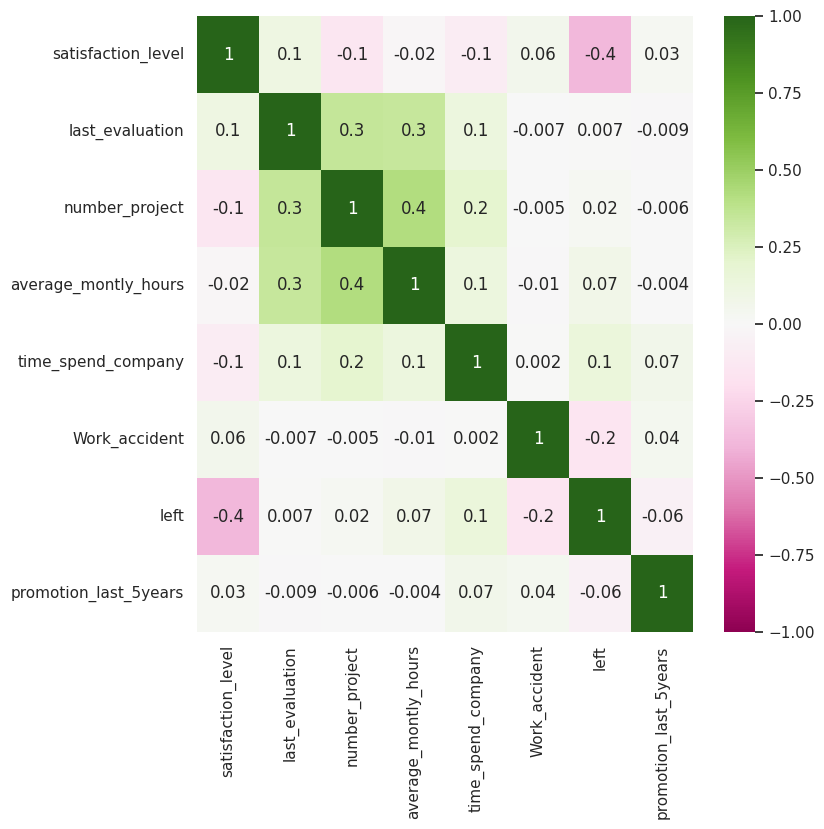

In [8]:
# Визуализируем при помощи тепловой карты
sns.set(rc={'figure.figsize':(8, 8)})
sns.heatmap(df.iloc[ :, 0:8].corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap='PiYG')

In [9]:
# две самые скоррелированные - кол-во проектов и среднее количество часов на рабочем месте в месяц
np.corrcoef(df['average_montly_hours'], df['number_project'])

array([[1.        , 0.41721063],
       [0.41721063, 1.        ]])

In [10]:
# две наименее скоррелированные переменные вычислим, т.к. визуально непонятно

In [11]:
np.corrcoef(df['Work_accident'], df['number_project'])

array([[ 1.        , -0.00474055],
       [-0.00474055,  1.        ]])

In [12]:
np.corrcoef(df['Work_accident'], df['time_spend_company'])

array([[1.        , 0.00212042],
       [0.00212042, 1.        ]])

In [13]:
np.corrcoef(df['promotion_last_5years'], df['average_montly_hours'])

array([[ 1.        , -0.00354441],
       [-0.00354441,  1.        ]])

In [14]:
# две наименее скоррелированные переменные - Инциденты на работе и стаж в компании

Пункт 4

In [15]:
# Рассчитайте сколько сотрудников работает в каждом департаменте
df['department']

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: department, Length: 14999, dtype: object

In [16]:
df_col_in_dep = df.groupby('department')['department'].count()
df_col_in_dep

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

**Пункт 5**

In [17]:
# Показать распределение сотрудников по зарплатам
df_disp_sal = df.groupby('salary')['salary'].count()
df_disp_sal

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

In [18]:
type(df_disp_sal)

pandas.core.series.Series

<Axes: title={'center': 'Количество сотрудников по зарплатам'}, ylabel='salary'>

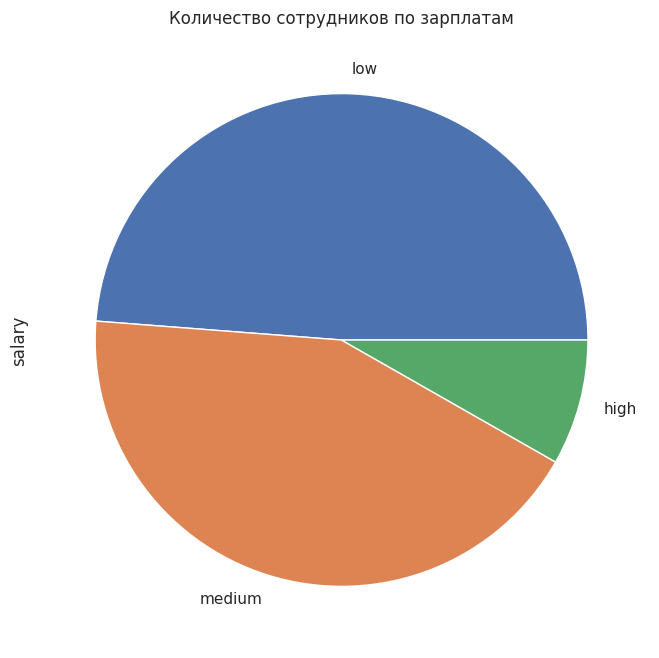

In [24]:
# количество сотрудников по зарплатам
pie_data = df['salary'].value_counts()
# pie_data
pie_data.plot(kind='pie', title='Количество сотрудников по зарплатам')

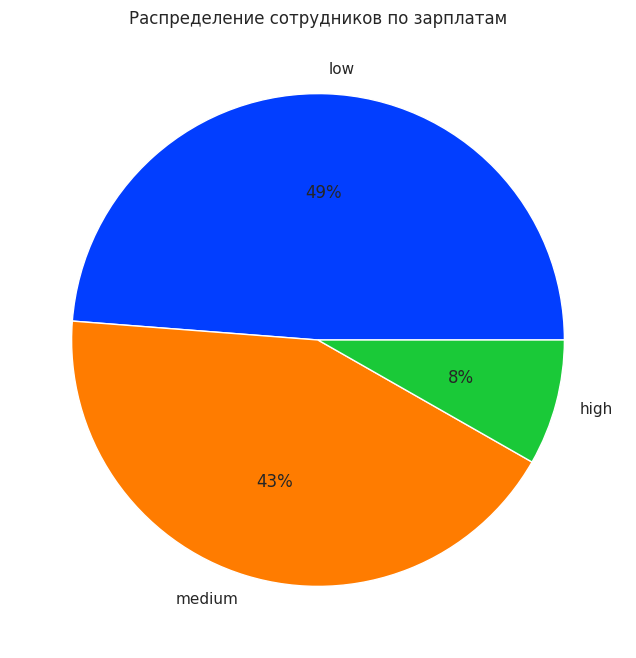

In [19]:

data_s = df['salary'].value_counts()
labels = df['salary'].unique()

#определим палитру Seaborn
colors = sns.color_palette('bright')[ 0:3 ]

#создадим pie chart
plt.pie(data_s, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Распределение сотрудников по зарплатам')
plt.show()

**Пункт 6**

In [20]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_disp_sal_in_dep = df[['department', 'salary']].groupby(['department', 'salary'])['salary'].count()
df_disp_sal_in_dep

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

<Axes: xlabel='department,salary'>

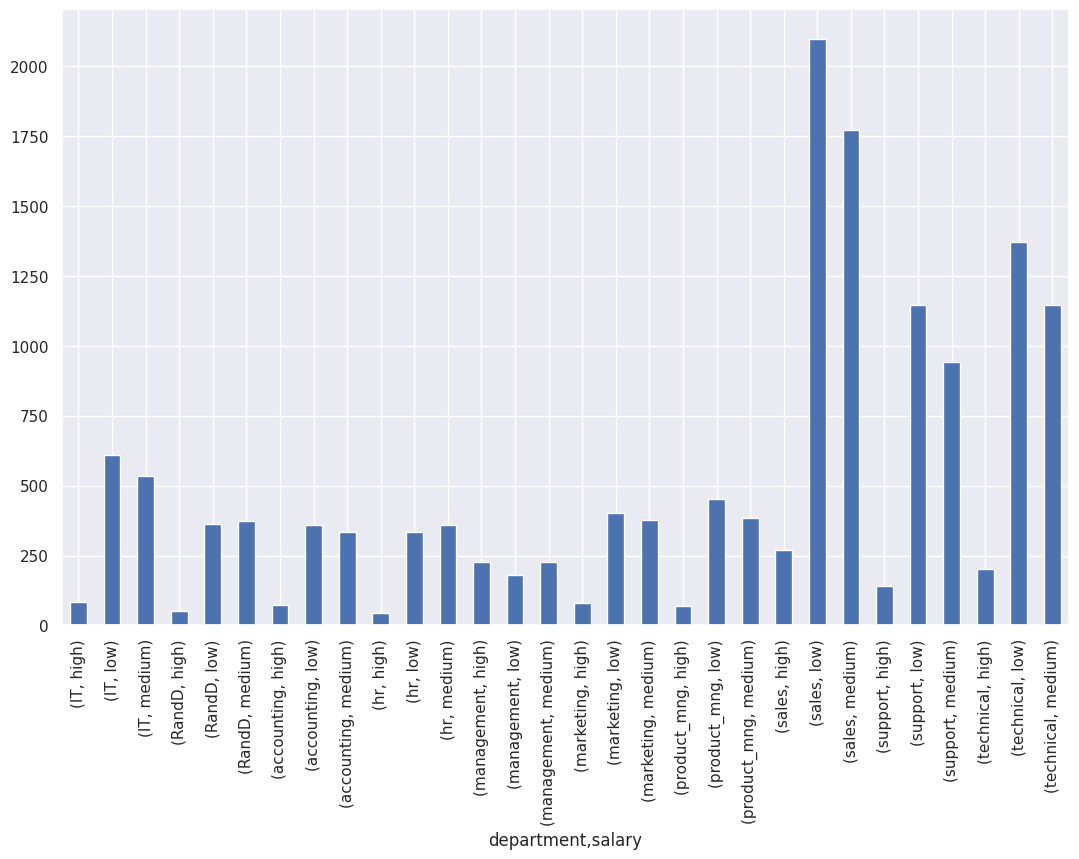

In [44]:
df[['department', 'salary']].groupby(['department', 'salary'])['salary'].count().plot(kind='bar', figsize=(13,8))

**Пункт 7**

In [45]:
# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [49]:
# Подготовка данных
df_spend = df[['average_montly_hours', 'salary']]
df_spend

,average_montly_hours,salary
0,157,low
1,262,medium
2,272,medium
3,223,low
4,159,low
...,...,...
14994,151,low
14995,160,low
14996,143,low
14997,280,low


In [25]:
df_spend_low = df.loc[(df['salary'] == 'low')]
df_spend_low

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [26]:
df_spend_high = df.loc[(df['salary'] == 'high')]
df_spend_high

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high
...,...,...,...,...,...,...,...,...,...,...
14829,0.45,0.57,2,148,3,0,1,0,marketing,high
14868,0.43,0.55,2,130,3,0,1,0,support,high
14902,0.45,0.46,2,159,3,0,1,0,hr,high
14941,0.43,0.49,2,131,3,0,1,0,RandD,high


Такой тест показывает, имеют ли две выборки разные средние значения. Здесь нулевая гипотеза заключается в том, что обе группы имеют равные средние.

In [37]:
stat, p = st.ttest_ind(df_spend_low['average_montly_hours'], df_spend_high['average_montly_hours'])

print(f"Статистика = {stat:.5f}, p = {p:.10f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = 0.72887, p = 0.4661023478
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


Сотрудники с высоким окладом проводят на работе больше времени, чем с low окладом, давайте посмотрим?


In [38]:
low = round(df_spend_low['average_montly_hours'].mean(), 1)
high = round(df_spend_high['average_montly_hours'].mean(), 1)
if low > high:
  print("В среднем low сегмент трудится усерднее")
else:
  print("Не потопаешь - не полопаешь!")
print('часов в неделю по сегментам заработка low и high:')
print(low, high)

В среднем low сегмент трудится усерднее
часов в неделю по сегментам заработка low и high:
201.0 199.9


Несмотря на небольшую разницу во времени пребывания на работе, на заработок это не влияет, вероятно в бОльшем заработке участвуют другие причины нежели, чем время работы в месяц

**ПУНКТ 8**

Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 10

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df_left0 = df.loc[(df['left'] == 0)]
df_left0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


In [5]:
df_count = df_left0.groupby('promotion_last_5years')['promotion_last_5years'].apply ( lambda x: (x == 1). sum ()). reset_index(name='count')
df_count

,promotion_last_5years,count
0,0,0
1,1,300


In [6]:
df_count['count'].iloc [1]

300

In [7]:
# Доля сотрудников с повышением за последние 5 лет
# ПРОВЕРОЧКА
d1 = df_left0['promotion_last_5years'].value_counts(normalize=True)
d1

0    0.973749
1    0.026251
Name: promotion_last_5years, dtype: float64

In [9]:
Ne_Uvol = df_left0.agg({'kf': ['mean'],
        'satisfaction_level' : ['mean'],
        'number_project' : ['mean']})
Ne_Uvol

,kf,satisfaction_level,number_project
mean,0.003333,0.66681,3.786664


In [10]:
df_left1 = df.loc[(df['left'] == 1)]
df_left1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Доля сотрудников с повышением за последние 5 лет
# ПРОВЕРОЧКА
d2 = df_left1['promotion_last_5years'].value_counts(normalize=True)
d2

0    0.994679
1    0.005321
Name: promotion_last_5years, dtype: float64

In [12]:
df_left1['kf'] = df_left1.groupby('promotion_last_5years')['promotion_last_5years'].transform(lambda x: x/x.sum())
df_left1['kf']

<ipython-input-12-b45af60ab944>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left1['kf'] = df_left1.groupby('promotion_last_5years')['promotion_last_5years'].transform(lambda x: x/x.sum())


0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
14994   NaN
14995   NaN
14996   NaN
14997   NaN
14998   NaN
Name: kf, Length: 3571, dtype: float64

In [13]:
Uvol = df_left1.agg({'kf': ['mean'],
        'satisfaction_level' : ['mean'],
        'number_project' : ['mean']})
Uvol

,kf,satisfaction_level,number_project
mean,0.052632,0.440098,3.855503


● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [14]:
Ne_Uvol, Uvol

(            kf  satisfaction_level  number_project
 mean  0.003333             0.66681        3.786664,
             kf  satisfaction_level  number_project
 mean  0.052632            0.440098        3.855503)

По всей видимости лучше увольняться))), % повышения выше за 5 лет выше у уволившихся, но и проектов придется сделать больше, а довольны уволившиеся ожидаемо ниже.

**Пункт 9**

In [72]:
# 9 Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник
#  на основе имеющихся факторов (кроме department и salary)
# Оценить качество модели на тестовой выборке

In [8]:
df_data = df[['satisfaction_level',	'last_evaluation',	'number_project',	'average_montly_hours', 'time_spend_company',	'Work_accident',	'promotion_last_5years']]
df_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [10]:
df_left = df['left']
df_left

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [11]:
type(df_left)

pandas.core.series.Series

In [12]:
#конвертируем series в NumPy array
df_left_array = df_left. to_numpy ()
df_left_array

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, df_left_array, random_state=42)

In [14]:
len(y_test)

3750

In [15]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
lda = LinearDiscriminantAnalysis()

In [17]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [38]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

In [42]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, y_pred]).T
result['raz'] = result[0] - result[1]
result

,0,1,raz
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,1
4,0,0,0
...,...,...,...
3745,0,0,0
3746,1,0,1
3747,0,0,0
3748,0,1,-1


In [43]:
result['raz'].abs().sum()

924

In [33]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

In [20]:
# Классы ( уволился - 1, не уволился - 0) - сильно не сбалансированы (3571 против 11428)
# Соответственно Accuracy не очень подходит для оценки

In [35]:
from sklearn. metrics import classification_report

In [44]:
#выведем classification report для модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



In [36]:
#с указанием столбцов
report = classification_report(y_test, lda.predict(X_test), target_names=['left0', 'left1'])
print(report)

              precision    recall  f1-score   support

       left0       0.79      0.91      0.85      2853
       left1       0.47      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.72      0.75      0.72      3750



Вот как интерпретировать вывод:

Точность : Из всех сотрудников, которых предсказывала модель, уволились только 47% .

Напомним : из всех сотрудников, которые действительно уволились, модель правильно предсказала этот результат только для 25% этих сотрудников.

Оценка F1 : это значение рассчитывается как:

Оценка F1: 2 * (Точность * Отзыв) / (Точность + Отзыв)
Оценка F1: 2 * (0,47 * 0,25) / (0,47 + 0,25)
Оценка F1: 0,32 .
Поскольку это значение не очень близко к 1, это говорит нам о том, что модель плохо предсказывает, уволится ли сотрудник или нет.

Поддержка : эти значения просто говорят нам, сколько сотрудников принадлежало к каждому классу в тестовом наборе данных. Мы видим, что среди сотрудников в тестовом наборе данных 2853 не увольнялись, а 897 уволились.